<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/94_C_DOE_DCL4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Librerías Básicas para Diseño de Experimentos**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
import scipy.stats as stats
!pip install bioinfokit
from bioinfokit.analys import stat
!pip install pingouin
import pingouin as pg

#  **Tema 4: Diseños Cuadrados Latinos - DCL usando Python: Versión 2**

##  <span style="color:green">**Ejemplo. Para comparar el consumo de gasolina de cuatro automoviles, A, B, C y D, cuatro conductores, Juan, Santiago, Emilio y Pepe, efectuan un recorrido prefijado en cuatro dias diferentes, de manera que cada conductor utiliza un coche diferente cada día. Tanto la asignación de los coches a sus conductores como el orden de los dias se hizo de forma aleatoria. Disponemos de los siguientes datos correspondientes a los litros consumidos cada 100 km. Se cree, además, que la visibilidad puede influir sobre el consumo. Para comprobarlo se repiten todas las pruebas en las mismas condiciones por la mañana, al mediodia y por la tarde, y se obtienen los siguientes datos**</span>

|Conductor \ Día|	1:Lunes	|2:Martes	|3:Miercoles	|4:Jueves|
|:--:|:--:|:--:|:--:|:--:|
|1:Juan	|A = 10, 11, 9|	B = 9.5, 9, 10|	D = 7, 6, 8|	C = 7, 12, 11|
|2:Santiago	|B = 8, 7, 9|	A = 10, 11, 9|	C = 6, 8, 9|	D = 9, 11, 7|
|3:Emilio	|C = 7, 8, 6|	D = 6.5, 7, 6	|A = 7, 6, 8|	B = 8, 4, 12|
|4:Pepe|	D = 6, 5, 7|	C = 5, 6, 4|	B = 8.5, 7, 5|	A = 9, 15, 3|



## **4.1 Los Datos del Problema**

In [31]:
## **4.1 Los Datos del Problema**
Conductor  =  ([ "Juan"]*12 + ["Santiago"]*12 +  ["Emilio"]*12 + ["Pepe"]*12)*1
Dia  =  ([ "Lunes"]*3 + ["Martes"]*3 +  ["Miercoles"]*3 + ["Jueves"]*3)*4
Turno = [ "Mañana", "Mediodia", "Tarde", "Mañana", "Mediodia", "Tarde", "Mañana", "Mediodia", "Tarde", "Mañana", "Mediodia", "Tarde",
        "Mañana", "Mediodia", "Tarde", "Mañana", "Mediodia", "Tarde", "Mañana", "Mediodia", "Tarde", "Mañana", "Mediodia", "Tarde",
        "Mañana", "Mediodia", "Tarde", "Mañana", "Mediodia", "Tarde", "Mañana", "Mediodia", "Tarde", "Mañana", "Mediodia", "Tarde",
        "Mañana", "Mediodia", "Tarde", "Mañana", "Mediodia", "Tarde", "Mañana", "Mediodia", "Tarde", "Mañana", "Mediodia", "Tarde",]

AUTO = ["A", "A","A", "B", "B", "B", "D", "D", "D", "C", "C", "C",
        "B", "B", "B", "A", "A", "A", "C", "C", "C", "D", "D", "D",
        "C", "C", "C", "D", "D", "D", "A", "A","A",  "B", "B", "B",
        "D", "D", "D", "C", "C", "C", "B", "B", "B", "A", "A", "A"]
Consumo =[10, 11, 9, 9.5, 9, 10,  7, 6, 8,  7, 12, 11,
          8, 7, 9,  10, 11, 9, 6, 8, 9,  9, 11, 7,
          7, 8, 6,  6.5, 7, 6, 7, 6, 8, 8, 4, 12,
          6, 5, 7, 5, 6, 4, 8.5, 7, 5, 9, 15, 3]

## **4.2 Construyamos el dataFrame de los precios y productos**

In [37]:
## **4.2 Construyamos el dataFrame de los precios y productos**
DCL = pd.DataFrame({'Conductor':Conductor, 'Dia':Dia, 'Turno':Turno, 'AUTO':AUTO, 'Consumo':Consumo})


## **4.3 Veamos el DataFrame**

In [38]:
## **4.3 Veamos el DataFrame**
DCL

,Conductor,Dia,Turno,AUTO,Consumo
0,Juan,Lunes,Mañana,A,10.0
1,Juan,Lunes,Mediodia,A,11.0
2,Juan,Lunes,Tarde,A,9.0
3,Juan,Martes,Mañana,B,9.5
4,Juan,Martes,Mediodia,B,9.0
5,Juan,Martes,Tarde,B,10.0
6,Juan,Miercoles,Mañana,D,7.0
7,Juan,Miercoles,Mediodia,D,6.0
8,Juan,Miercoles,Tarde,D,8.0
9,Juan,Jueves,Mañana,C,7.0


## **4.5. BoxPlot para DCL - Consumo**

<Axes: title={'center': 'Consumo vs Turno'}, xlabel='Turno', ylabel='Consumo'>

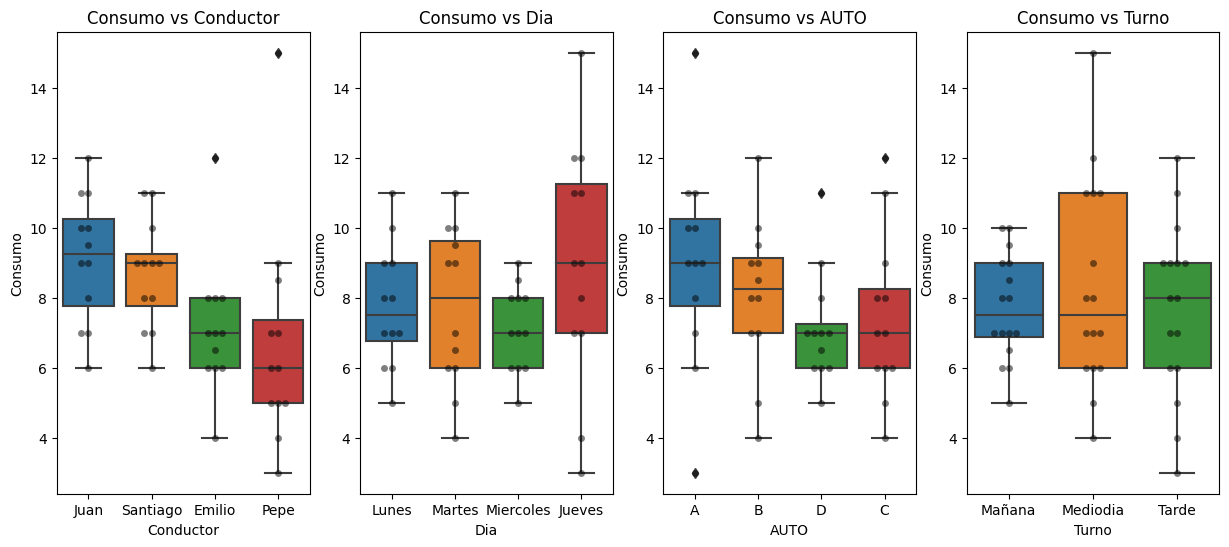

In [43]:
fig, axs = plt.subplots(1, 4, figsize=(15, 6))
axs[0].set_title('Consumo vs Conductor')
sns.boxplot(x="Conductor", y="Consumo", data=DCL, ax=axs[0])
sns.swarmplot(x="Conductor", y="Consumo", data=DCL, color='black',
              alpha = 0.5, ax=axs[0])

axs[1].set_title('Consumo vs Dia')
sns.boxplot(x="Dia", y="Consumo", data=DCL, ax=axs[1])
sns.swarmplot(x="Dia", y="Consumo", data=DCL, color='black',
              alpha = 0.5, ax=axs[1])
axs[2].set_title('Consumo vs AUTO')
sns.boxplot(x="AUTO", y="Consumo", data=DCL, ax=axs[2])
sns.swarmplot(x="AUTO", y="Consumo", data=DCL, color='black',
              alpha = 0.5, ax=axs[2])

axs[3].set_title('Consumo vs Turno')
sns.boxplot(x="Turno", y="Consumo", data=DCL, ax=axs[3])
sns.swarmplot(x="Turno", y="Consumo", data=DCL, color='black',
              alpha = 0.5, ax=axs[3])

## **4.6 Diagrama Bivariado no es sposible dado que no hay replicas**

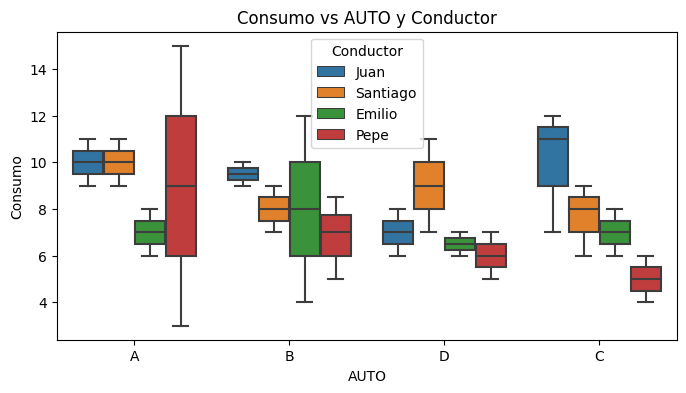

In [44]:
## **4.6 Diagrama Bivariado no es sposible dado que no hay replicas**
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Consumo vs AUTO y Conductor')
sns.boxplot(x="AUTO", y="Consumo", hue='Conductor', data=DCL, ax=ax);

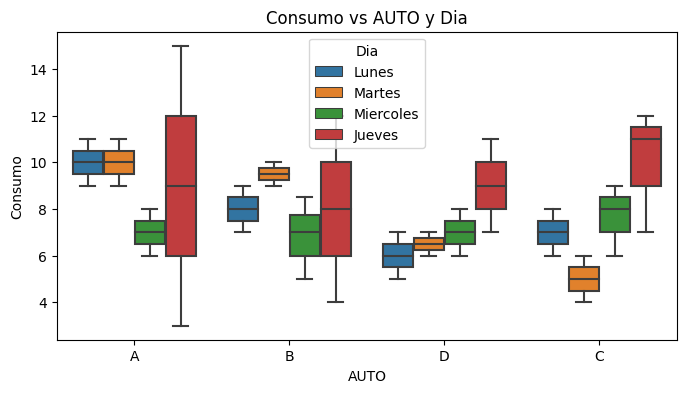

In [45]:
## **4.6 Diagrama Bivariado no es sposible dado que no hay replicas**
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Consumo vs AUTO y Dia')
sns.boxplot(x="AUTO", y="Consumo", hue='Dia', data=DCL, ax=ax);

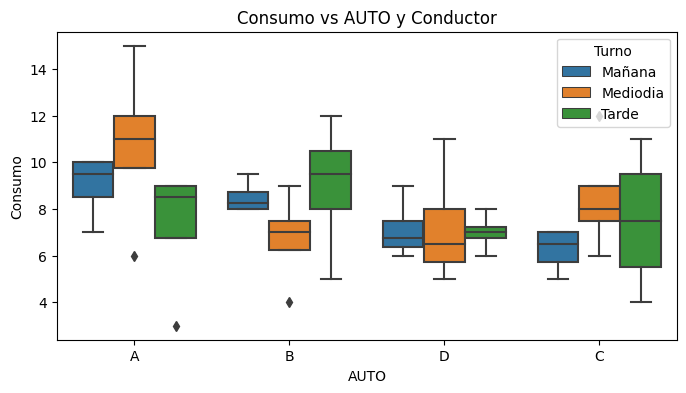

In [46]:
## **4.6 Diagrama Bivariado no es sposible dado que no hay replicas**
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Consumo vs AUTO y Conductor')
sns.boxplot(x="AUTO", y="Consumo", hue='Turno', data=DCL, ax=ax);

## **4.7 Análisis de Varianza Tipo I**

1.   Elemento de la lista
2.   Elemento de la lista



In [47]:
# **4.7 Análisis de Varianza Tipo II**
modeloDCL = ols("Consumo ~ AUTO + Conductor + Dia + Turno", data = DCL).fit()
anova_result2 = sm.stats.anova_lm(modeloDCL, typ=1)
print (anova_result2)

             df      sum_sq    mean_sq         F    PR(>F)
AUTO        3.0   24.932292   8.310764  1.859992  0.153854
Conductor   3.0   49.307292  16.435764  3.678410  0.020770
Dia         3.0   22.265625   7.421875  1.661054  0.192628
Turno       2.0    3.968750   1.984375  0.444113  0.644859
Residual   36.0  160.854167   4.468171       NaN       NaN


In [48]:
anova_result2.T

,AUTO,Conductor,Dia,Turno,Residual
df,3.000000,3.000000,3.000000,2.000000,36.000000
sum_sq,24.932292,49.307292,22.265625,3.968750,160.854167
mean_sq,8.310764,16.435764,7.421875,1.984375,4.468171
F,1.859992,3.678410,1.661054,0.444113,NaN
PR(>F),0.153854,0.020770,0.192628,0.644859,NaN


In [49]:
print(modeloDCL.summary())

                            OLS Regression Results                            
Dep. Variable:                Consumo   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     2.044
Date:                Thu, 21 Sep 2023   Prob (F-statistic):             0.0526
Time:                        16:34:20   Log-Likelihood:                -97.132
No. Observations:                  48   AIC:                             218.3
Df Residuals:                      36   BIC:                             240.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 9.12

## **4.8 Análisis de Varianza Tipo I - Usando Statgraphics**



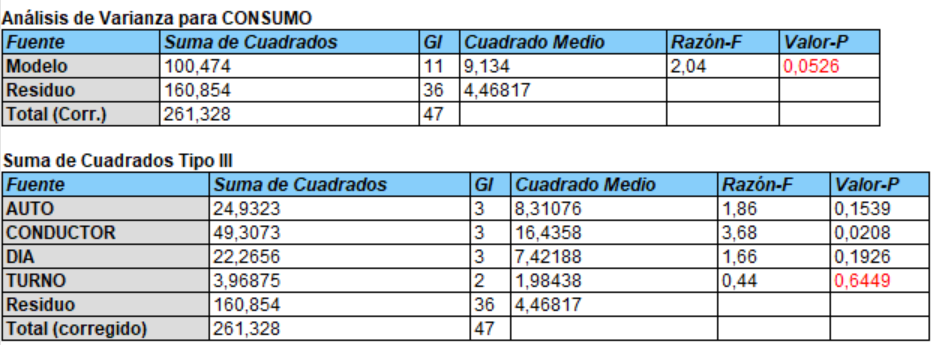

## **4.9 Comparaciones Múltiples**
### **a. Comparaciones Múltiples:DCL - AUTO**

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,-0.9167,0.7678,-3.4432,1.6099,False
A,C,-1.5833,0.3498,-4.1099,0.9432,False
A,D,-1.875,0.2105,-4.4016,0.6516,False
B,C,-0.6667,0.8948,-3.1932,1.8599,False
B,D,-0.9583,0.7429,-3.4849,1.5682,False
C,D,-0.2917,0.9897,-2.8182,2.2349,False


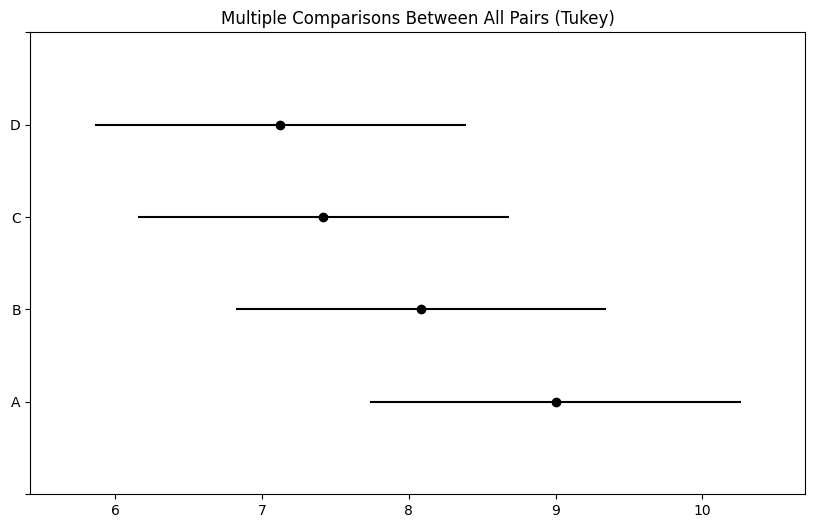

In [50]:
### **a. Comparaciones Múltiples**
tukey = pairwise_tukeyhsd(endog=DCL["Consumo"],     # Data
                          groups=DCL["AUTO"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

### **a. Comparaciones Múltiples:DCL - AUTO - Usando Statgraphics**

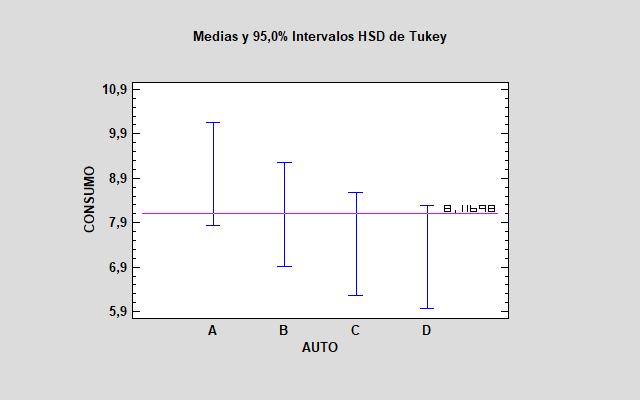

### **b. Comparaciones Múltiples: DCL - Conductor - Usando Python y Statgraphics**

group1,group2,meandiff,p-adj,lower,upper,reject
Emilio,Juan,2.0,0.1306,-0.3928,4.3928,False
Emilio,Pepe,-0.4167,0.9663,-2.8094,1.9761,False
Emilio,Santiago,1.5417,0.3256,-0.8511,3.9344,False
Juan,Pepe,-2.4167,0.0469,-4.8094,-0.0239,True
Juan,Santiago,-0.4583,0.9559,-2.8511,1.9344,False
Pepe,Santiago,1.9583,0.1433,-0.4344,4.3511,False


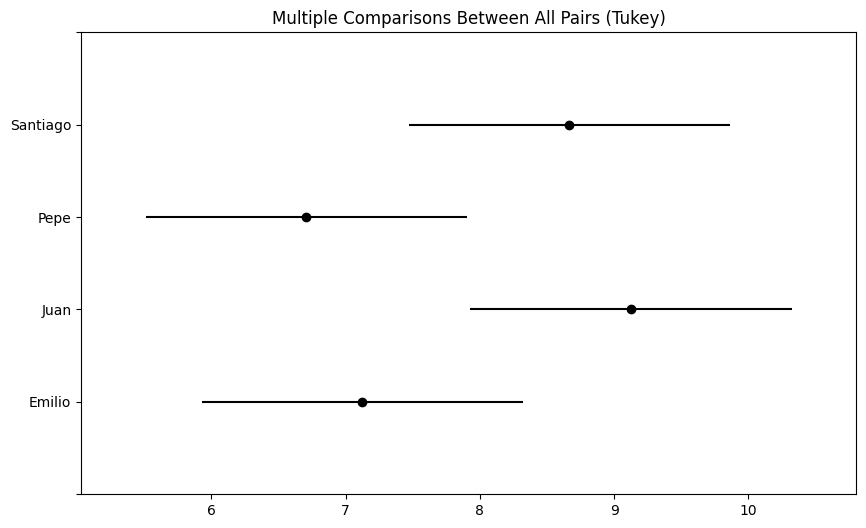

In [51]:
### **b. Comparaciones Múltiples**
tukey = pairwise_tukeyhsd(endog=DCL["Consumo"],     # Data
                          groups=DCL["Conductor"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

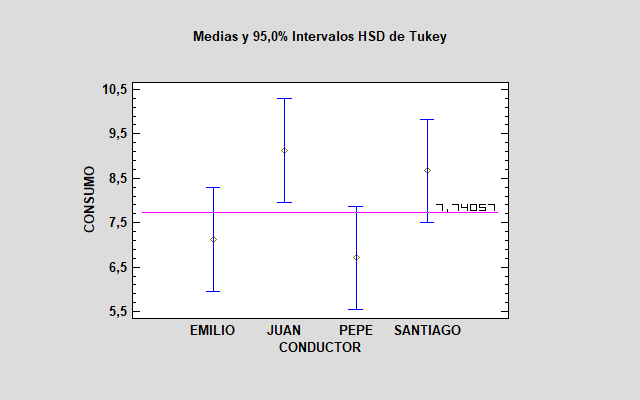

### **c. Comparaciones Múltiples: DCL - Dia - Usando Pytho y Statgraphics**

group1,group2,meandiff,p-adj,lower,upper,reject
Jueves,Lunes,-1.25,0.5594,-3.7908,1.2908,False
Jueves,Martes,-1.25,0.5594,-3.7908,1.2908,False
Jueves,Miercoles,-1.875,0.2147,-4.4158,0.6658,False
Lunes,Martes,0.0,1.0,-2.5408,2.5408,False
Lunes,Miercoles,-0.625,0.9126,-3.1658,1.9158,False
Martes,Miercoles,-0.625,0.9126,-3.1658,1.9158,False


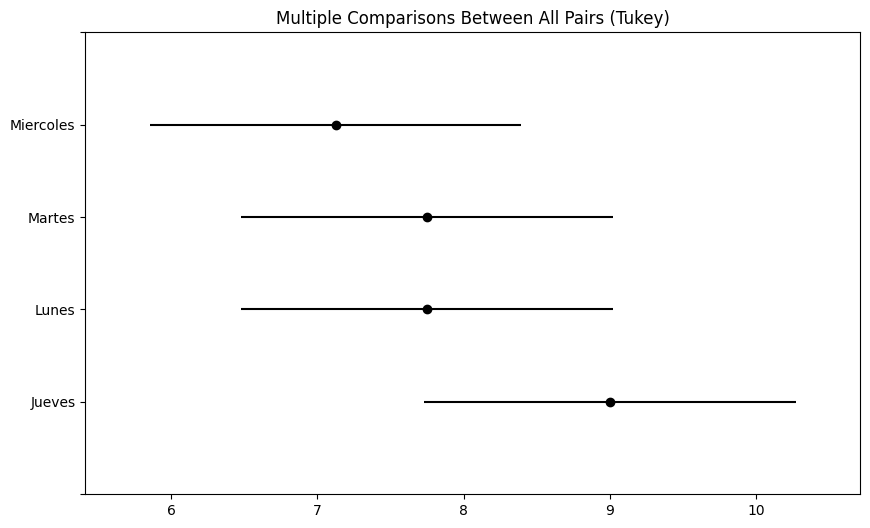

In [52]:
### **c. Comparaciones Múltiples**
tukey = pairwise_tukeyhsd(endog=DCL["Consumo"],     # Data
                          groups=DCL["Dia"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

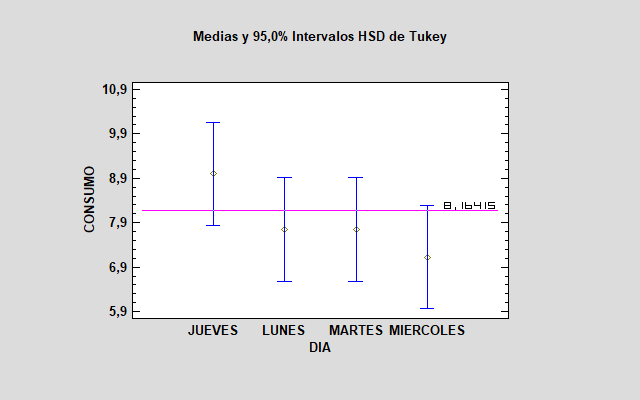

### **c. Comparaciones Múltiples: DCL - Turno - Usando Pytho y Statgraphics**

group1,group2,meandiff,p-adj,lower,upper,reject
Mañana,Mediodia,0.5938,0.7634,-1.4554,2.6429,False
Mañana,Tarde,-0.0312,0.9992,-2.0804,2.0179,False
Mediodia,Tarde,-0.625,0.7416,-2.6742,1.4242,False


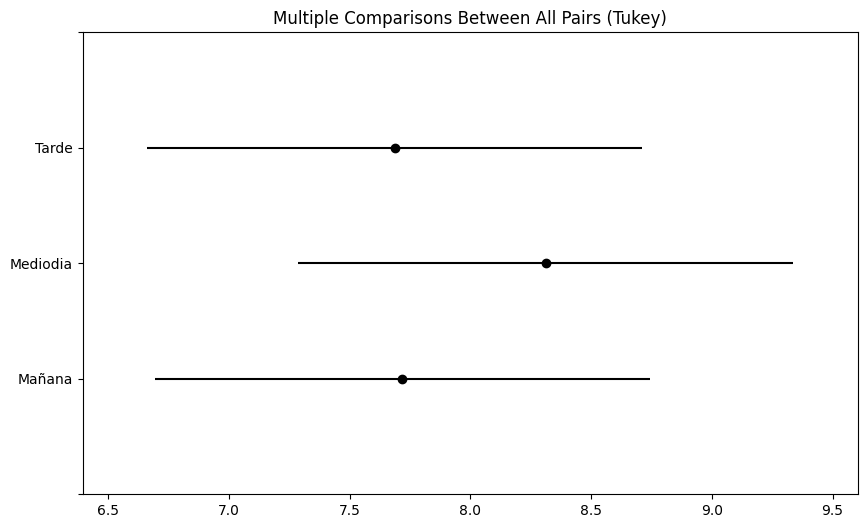

In [54]:
### **c. Comparaciones Múltiples**
tukey = pairwise_tukeyhsd(endog=DCL["Consumo"],     # Data
                          groups=DCL["Turno"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

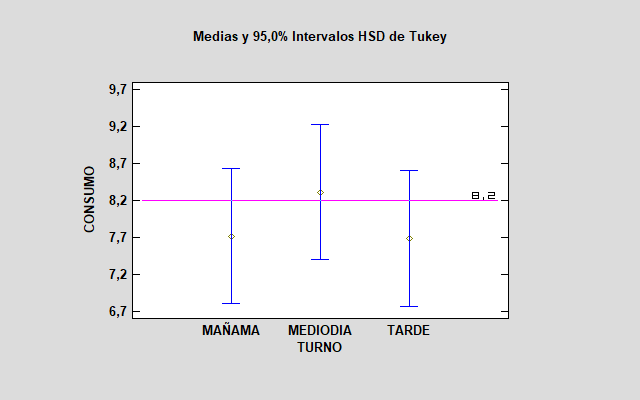

## **4.10 Supuestos del Modelo**
# **a. Forma 1. Shapiro Wilks**

In [55]:
# **a. Forma 1. Shapiro Wilks**
statistic, pvalue = stats.shapiro(modeloDCL.resid)
print(f'El valor critico Shapiro wilks es {round(statistic,3)} y el valor p = {round(pvalue,1)*100} > 5%')

El valor critico Shapiro wilks es 0.931 y el valor p = 0.0 > 5%


# **b. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**

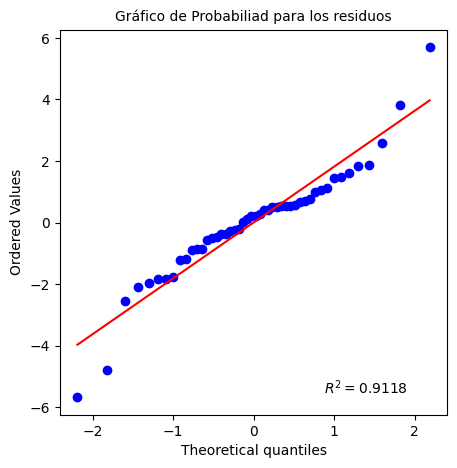

In [56]:
# **b. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)
normality_plot, stat = stats.probplot(modeloDCL.resid, plot= plt, rvalue= True)
ax.set_title("Gráfico de Probabiliad para los residuos", fontsize= 10)
ax.set

plt.show()

# **c. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**

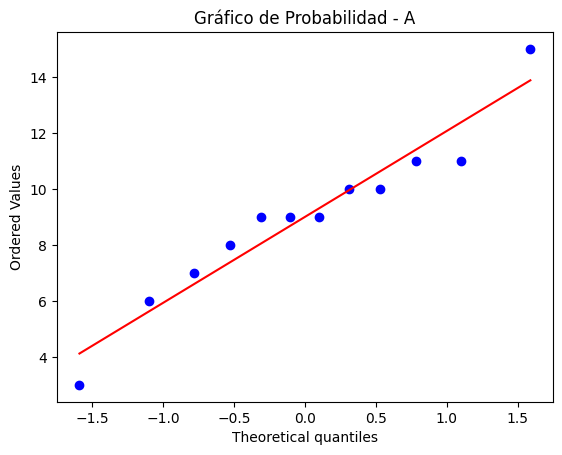

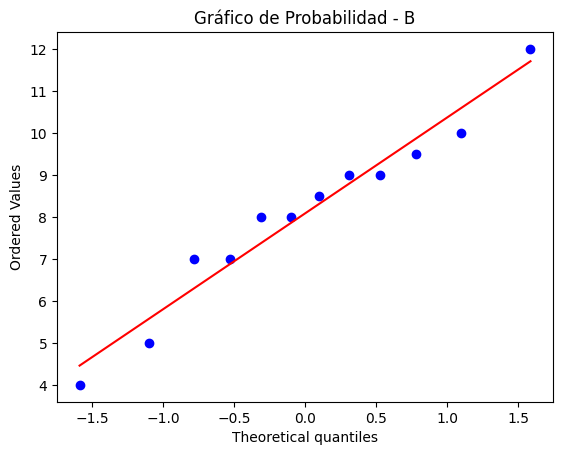

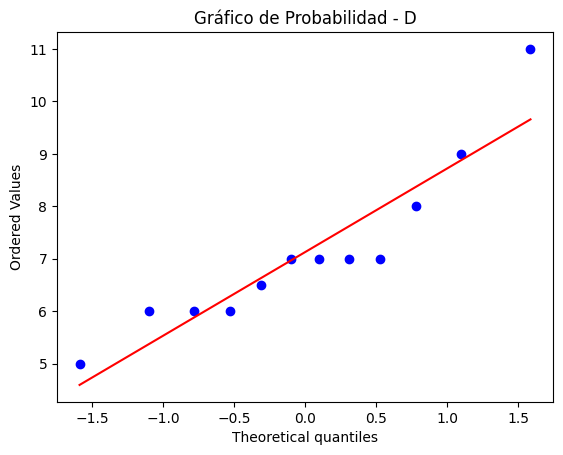

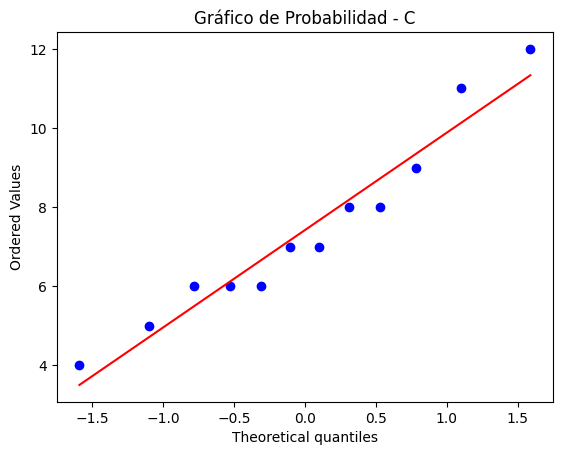

In [57]:
# **c. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma: Por VITAMINAS**
unique_vitaminas = DCL['AUTO'].unique()
for vitamina in unique_vitaminas:
    stats.probplot(DCL[DCL['AUTO'] == vitamina]['Consumo'], dist="norm", plot=plt)
    plt.title("Gráfico de Probabilidad - "+vitamina)
    plt.show()

## **d. Histograma + curva normal teórica**

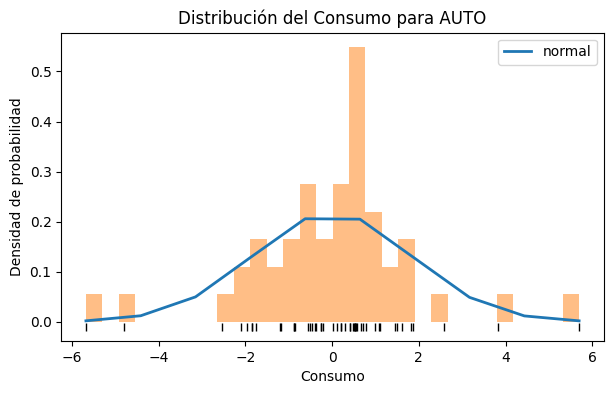

In [58]:
## **d. Histograma + curva normal teórica**
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
tgp2 = modeloDCL.resid
mu, sigma = stats.norm.fit(tgp2)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(tgp2), max(tgp2), num=10)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=tgp2, density=True, bins=30,  alpha=0.5)
ax.plot(tgp2, np.full_like(tgp2, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución del Consumo para AUTO')
ax.set_xlabel('Consumo')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

## **e. Homocedasticidad de los residuos: Usando la prueba de Levene**

In [60]:
# e. Homocedasticidad de los residuos: Usando la prueba de Levene
statistic, pvalue = stats.levene(DCL['Consumo'][DCL['AUTO'] == 'A'],
             DCL['Consumo'][DCL['AUTO'] == 'B'],
             DCL['Consumo'][DCL['AUTO'] == 'C'],
             DCL['Consumo'][DCL['AUTO'] == 'D'])
print(f'El valor critico Levene es {round(statistic,3)} y el valor p = {round(pvalue,1)*100}% > 5%')


El valor critico Levene es 0.783 y el valor p = 50.0% > 5%
